LAB 1: EXPLORING TABLE DATA

-TEAM:
- EMMANUEL NWORIE,
- PHILEMON AKUBUEZE,
- KENULE NWIGBO

TELCO CUSTOMER CHURN
url - https://www.kaggle.com/datasets/blastchar/telco-customer-churn
(Focused customer retention programs)

Business Understanding
The Telco Customer Churn dataset provides a customer-level snapshot of a telecommunications service provider, where each observation corresponds to an individual customer and each variable describes demographic characteristics, subscribed services, billing information, and contractual details. The dataset was originally developed and distributed by IBM as a benchmark dataset to support research and applied analytics on customer churn, a critical issue in subscription-based industries. In practice, such data would be routinely collected through a company’s billing systems, service provisioning platforms, and customer relationship management (CRM) databases as part of normal business operations rather than through a dedicated research study.

Customer churn represents a major challenge in the telecommunications industry due to intense competition and low switching costs, which allow customers to easily change providers. Retaining existing customers is generally more cost-effective than acquiring new ones, making churn reduction a strategic priority. Consequently, telecom companies analyze historical customer data to identify behavioral and contractual patterns associated with customer attrition and to design proactive retention strategies.

The dataset captures a comprehensive range of factors that may influence churn, including churn status, service subscriptions (such as phone service, internet service, online security, technical support, and streaming services), contractual and billing attributes (tenure, contract type, payment method, monthly charges, and total charges), and basic demographic information (gender, senior citizen status, partner status, and dependents). Together, these features provide a multidimensional view of customer behavior and enable the investigation of both economic and service-related drivers of churn.

The primary prediction task associated with this dataset is a binary classification problem, where the objective is to predict whether a customer will churn (Yes) or remain with the company (No) in a future period based on their observed characteristics. This prediction is of interest to multiple stakeholders. Marketing and retention teams can use churn predictions to target high-risk customers with personalized offers, customer support departments can prioritize outreach to vulnerable accounts, and business strategists can evaluate how pricing structures, contract terms, and service bundles influence customer retention. Additionally, churn forecasts are valuable for financial planning, as they directly affect revenue projections and customer lifetime value estimates.

For these stakeholders, a prediction model is considered useful not solely based on overall accuracy, but on its ability to meaningfully distinguish high-risk customers from low-risk ones. In practical settings, a useful model should substantially outperform a naïve baseline (such as predicting the average churn rate for all customers) and provide strong ranking performance, enabling the company to focus limited retention resources on a small subset of customers with significantly elevated churn risk. Achieving higher churn concentration within the top-ranked predictions, such as identifying a segment where churn rates are multiple times higher than the population average, would make the model operationally valuable and economically justifiable for retention decision-making.

DATA UNDERSTANDING

In [127]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")


file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
full_file_path = os.path.join(path, file_name)
df = pd.read_csv(full_file_path)

df.head()



Using Colab cache for faster access to the 'telco-customer-churn' dataset.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
df.iloc[488]

,488
customerID,4472-LVYGI
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes


In [129]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [130]:
import pandas as pd

# Create attribute overview table
attribute_overview = pd.DataFrame({
    "Feature": df.columns,
    "Description": [
        "Unique customer identifier",
        "Customer gender (Male/Female)",
        "Whether the customer is a senior citizen",
        "Whether the customer has a partner",
        "Whether the customer has dependents",
        "Number of months the customer has stayed with the company",
        "Whether phone service is subscribed",
        "Whether multiple phone lines are subscribed",
        "Type of internet service subscribed",
        "Whether online security service is subscribed",
        "Whether online backup service is subscribed",
        "Whether device protection service is subscribed",
        "Whether technical support service is subscribed",
        "Whether streaming TV service is subscribed",
        "Whether streaming movies service is subscribed",
        "Type of customer contract",
        "Whether paperless billing is enabled",
        "Payment method used by the customer",
        "Monthly billing amount",
        "Total amount billed to the customer",
        "Customer churn status"
    ],
    "Data Type": [
        "Categorical (ID)",
        "Categorical",
        "Binary (0/1)",
        "Categorical",
        "Categorical",
        "Numerical (Integer)",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Categorical",
        "Numerical (Float)",
        "Numerical (Float)",
        "Categorical (Target)"
    ]
})

attribute_overview


,Feature,Description,Data Type
0,customerID,Unique customer identifier,Categorical (ID)
1,gender,Customer gender (Male/Female),Categorical
2,SeniorCitizen,Whether the customer is a senior citizen,Binary (0/1)
3,Partner,Whether the customer has a partner,Categorical
4,Dependents,Whether the customer has dependents,Categorical
5,tenure,Number of months the customer has stayed with ...,Numerical (Integer)
6,PhoneService,Whether phone service is subscribed,Categorical
7,MultipleLines,Whether multiple phone lines are subscribed,Categorical
8,InternetService,Type of internet service subscribed,Categorical
9,OnlineSecurity,Whether online security service is subscribed,Categorical


In [131]:
print(df.dtypes)
print('===========')
print(df.info())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Depe

Data Quality

Based on the DataFrame summary, the Telco Customer Churn dataset consists of 7,043 observations. Most features contain 7,043 non-null entries, indicating that the dataset is largely complete. However, closer examination reveals that the TotalCharges variable includes values recorded as blank spaces, which represent implicit missing values rather than valid numerical entries.

In total, 11 observations contain missing values in the TotalCharges feature. No duplicate records were identified in the dataset.

After careful consideration, we concluded that these missing values are likely the result of data entry errors or correspond to customers who terminated their contracts shortly after activation, before total charges could be fully recorded. Given the small number of missing observations relative to the dataset size, appropriate imputation strategies can be applied without significantly affecting the overall data integrity.



In [132]:
df.duplicated().sum()

np.int64(0)

In [133]:
df.loc[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


From the dataset, we observed that 10 out of the 11 customers with missing values in the TotalCharges variable were on two-year contracts. After further examining customers with one-year and two-year contracts, we decided to impute the missing values using the mean, as the number of missing observations was relatively small.

In [134]:

# We forced non-numeric values (blank spaces) to become NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# We confirm that the missing values are now numeric values with
df["TotalCharges"].isna().sum()




np.int64(11)

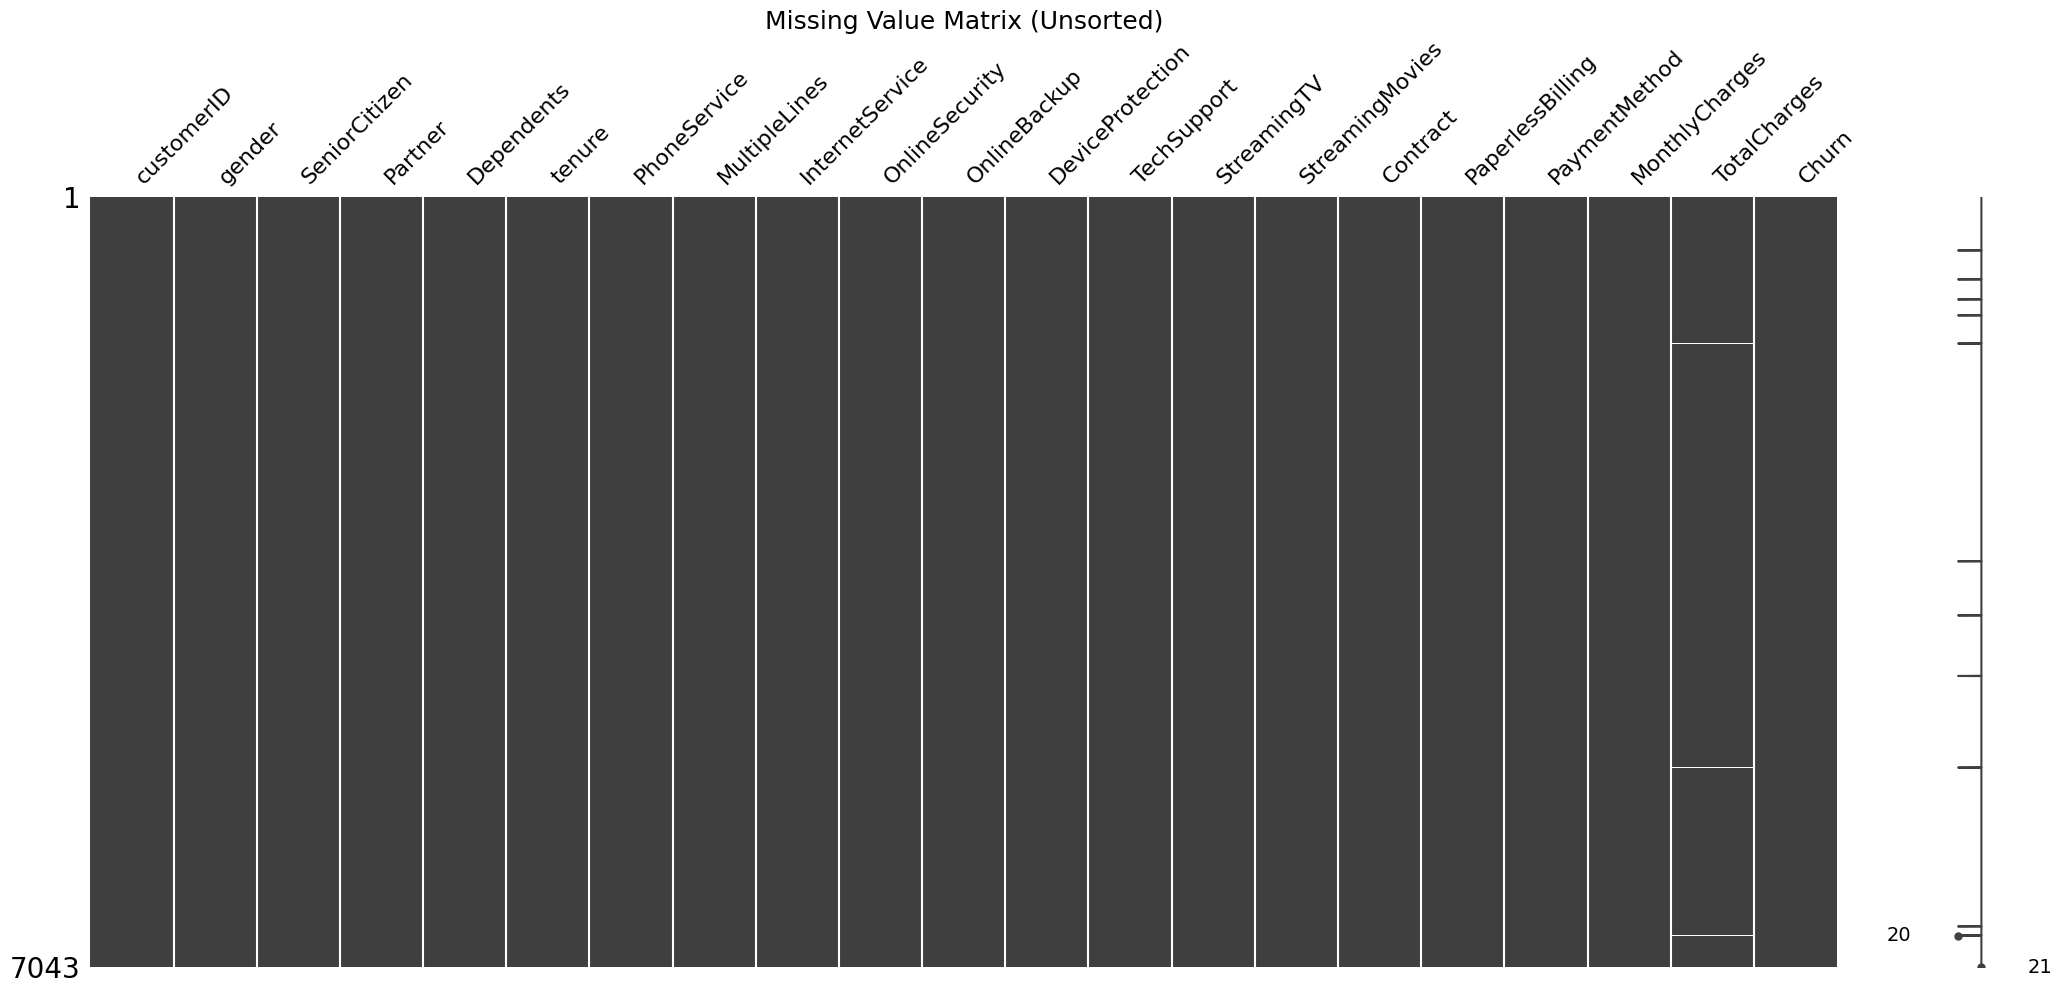

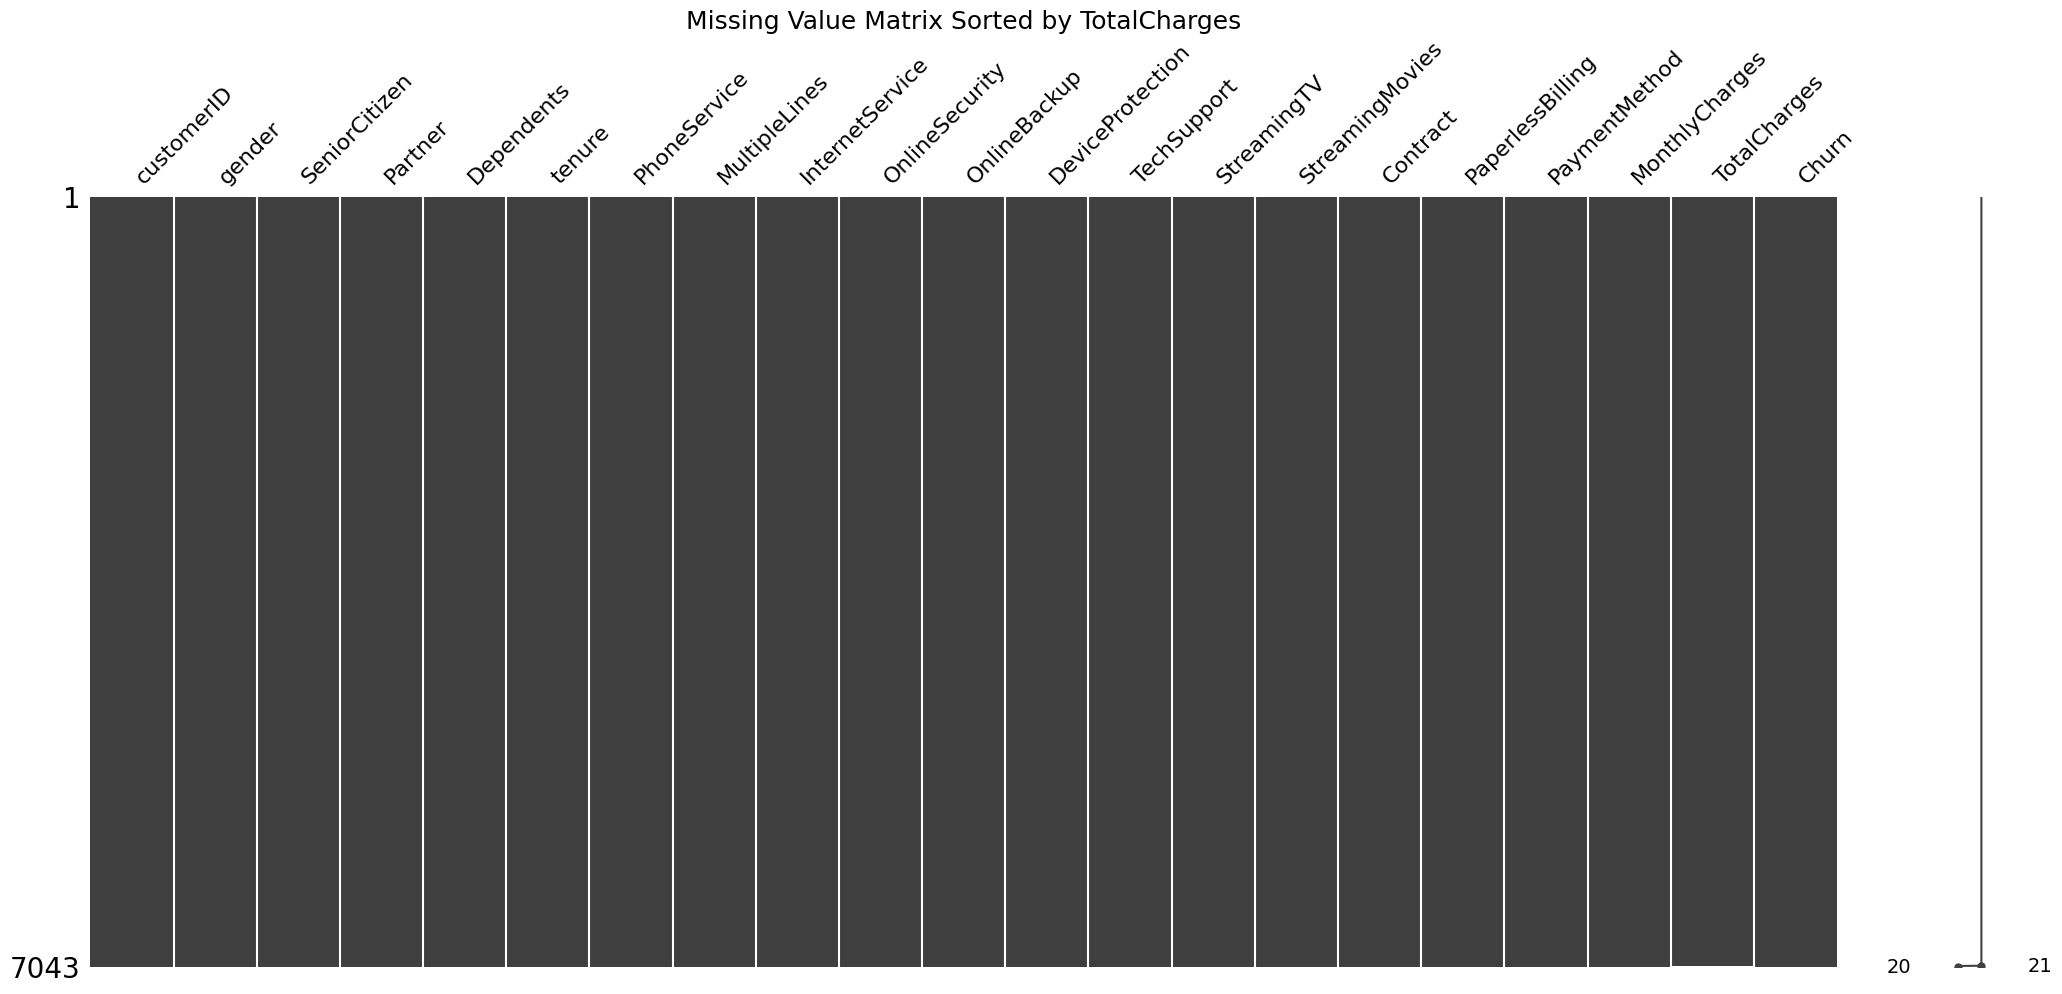

In [135]:
# Enable inline plotting in Jupyter notebooks
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
%matplotlib inline

# External package for missing data visualization
import missingno as msno

# Visualize missing values in the original dataset
msno.matrix(df)
plt.title("Missing Value Matrix (Unsorted)", fontsize=18)
plt.show()

# Visualize missing values sorted by TotalCharges
msno.matrix(df.sort_values(by="TotalCharges"))
plt.title("Missing Value Matrix Sorted by TotalCharges", fontsize=18)
plt.show()

In [136]:
# Compute the mean
mean_total_charges = df["TotalCharges"].mean()

# Fill missing values with the mean
df["TotalCharges"].fillna(mean_total_charges, inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/tmp/ipython-input-2517883450.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(mean_total_charges, inplace=True)


In [137]:
"""
# We forced non-numeric values (blank spaces) to become NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# we confirm that the missing values now numeric values with
df["TotalCharges"].isna().sum()

# Compute the mean
mode_total_charges = df["TotalCharges"].mode()[0]

# Fill missing values with the mean
df["TotalCharges"].fillna(mode_total_charges, inplace=True)


df.info()
"""

'\n# We forced non-numeric values (blank spaces) to become NaN\ndf["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")\n\n# we confirm that the missing values now numeric values with\ndf["TotalCharges"].isna().sum()\n\n# Compute the mean\nmode_total_charges = df["TotalCharges"].mode()[0]\n\n# Fill missing values with the mean\ndf["TotalCharges"].fillna(mode_total_charges, inplace=True)\n\n\ndf.info()\n'

In [138]:
"""
# We forced non-numeric values (blank spaces) to become NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# we confirm that the missing values now numeric values with
df["TotalCharges"].isna().sum()

# Compute the mean
median_total_charges = df["TotalCharges"].median()

# Fill missing values with the mean
df["TotalCharges"].fillna(median_total_charges, inplace=True)


df.info()
"""

'\n# We forced non-numeric values (blank spaces) to become NaN\ndf["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")\n\n# we confirm that the missing values now numeric values with\ndf["TotalCharges"].isna().sum()\n\n# Compute the mean\nmedian_total_charges = df["TotalCharges"].median()\n\n# Fill missing values with the mean\ndf["TotalCharges"].fillna(median_total_charges, inplace=True)\n\n\ndf.info()\n'

In [139]:
df.iloc[488]

,488
customerID,4472-LVYGI
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes
